In [1]:
#pip install pycountry

import plotly.graph_objects as go
import pandas as pd
import pycountry

In [2]:
df=pd.read_csv('../data/cities_projects.csv',  encoding='utf-8', delimiter=',')


In [3]:
if len(df) > 160:
    df=df.drop(index=(160), columns=('index'))

df['proj_number']=[int(value) for ind, value in df['proj_number'].iteritems()]
df

,index,city,proj_number,country
0,0,Aachen,1,Germany
1,1,Aarhus,1,Denmark
2,2,Ajaccio,1,France
3,3,Alessandria,1,Italy
4,4,Alingsås,1,Sweden
...,...,...,...,...
155,155,Weilerbach,1,Germany
156,156,Weiz,1,Austria
157,157,Zagorje,1,Croatia
158,158,Zaragoza,2,Spain


In [4]:
def get_iso_alpha (country_name):
    country = pycountry.countries.get(name=country_name) 
    return (country.alpha_3)

In [5]:
df['iso_alpha']=[get_iso_alpha(str(value)) for index, value in df['country'].iteritems()]

In [6]:
df

,index,city,proj_number,country,iso_alpha
0,0,Aachen,1,Germany,DEU
1,1,Aarhus,1,Denmark,DNK
2,2,Ajaccio,1,France,FRA
3,3,Alessandria,1,Italy,ITA
4,4,Alingsås,1,Sweden,SWE
...,...,...,...,...,...
155,155,Weilerbach,1,Germany,DEU
156,156,Weiz,1,Austria,AUT
157,157,Zagorje,1,Croatia,HRV
158,158,Zaragoza,2,Spain,ESP


In [18]:
df_pivot1=df.groupby(['iso_alpha','country'])[['proj_number']].sum()

In [19]:
df_pivot1=df_pivot1.reset_index()
df_pivot1.head(5)

,iso_alpha,country,proj_number
0,AUT,Austria,10
1,BEL,Belgium,2
2,BGR,Bulgaria,3
3,BRA,Brazil,1
4,CHE,Switzerland,4
5,CZE,Czechia,1
6,DEU,Germany,17
7,DNK,Denmark,9
8,ESP,Spain,30
9,EST,Estonia,3


In [44]:
df_pivot1['proj_number'].sum()

208

In [45]:
import plotly.express as px
fig = px.scatter_geo(df_pivot1, locations="iso_alpha",
                     hover_name='country', size="proj_number",
                     projection="natural earth", color='country')
fig.update_geos(
    visible=True, resolution=50, scope="world", showcountries=True, countrycolor="Black", 
)

fig.show()

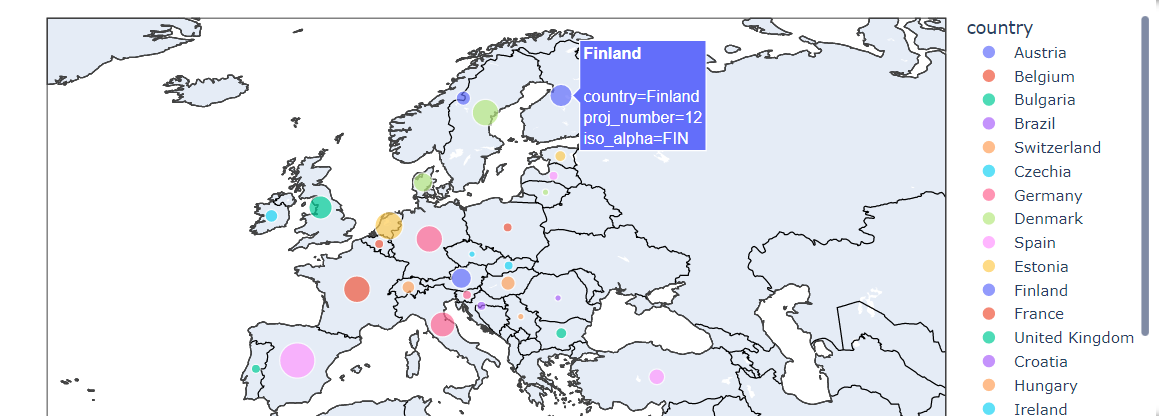

subreg = df['subreg']
px.scatter_geo(df, lat=df['Latitude'], lon=df['Longitude'], color='subreg', height=600)

In [25]:
# Options to create a pivot table in more elegant way (with actyally applying a specific fuction)
#df_pivot=df.pivot_table(index=['country'], values=['proj_number'],aggfunc=['sum'])
#ddd= df.pivot_table('proj_number', index = ['country'], aggfunc=['sum'])